In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'..\img\coin.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# 移除噪声
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# 确定背景区域
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# 确定前景
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

#寻找不确定区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# 标记Marker
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,255,255]


0


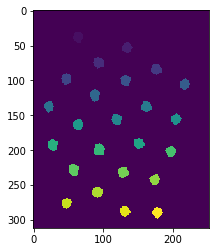

In [4]:
plt.imshow(markers)
# plt.imshow(markers)
print(markers.min())



(-0.5, 251.5, 311.5, -0.5)

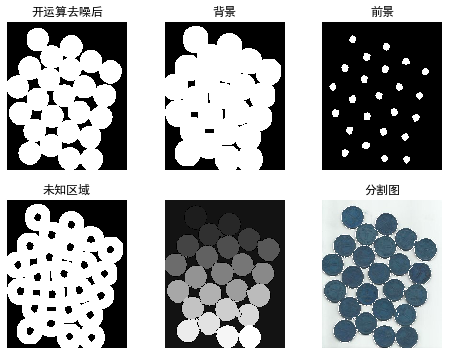

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负
# from chap2_createImage import *
%matplotlib inline
plt.figure(figsize=(8,6))
plt.subplot(231)
plt.imshow(opening  ,cmap="gray")
plt.title("开运算去噪后")
plt.axis("off")
plt.subplot(232)
plt.imshow(sure_bg  ,cmap="gray")
plt.title("背景")
plt.axis("off")
plt.subplot(233)
plt.imshow(sure_fg  ,cmap="gray")
plt.title("前景")
plt.axis("off")
plt.subplot(234)
plt.imshow(unknown  ,cmap="gray")
plt.title("未知区域")
plt.axis("off")
plt.subplot(235)
plt.imshow(markers  ,cmap="gray")
plt.title("标记图")
plt.title("")
plt.axis("off")
plt.subplot(236)
plt.imshow(img,cmap="gray")
plt.title("分割图")
plt.axis("off")

